In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split

df=pd.read_csv(r"D:\projects\Supervised Machine Learning\Customer Churn Prediction Using Classfication\cleaned_customer_churn.csv")
df.head(2)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,0,2,1,1,0,1,1,1,1,0,1,0,29.85,0
1,0,0,0,34,1,1,1,0,1,0,1,1,1,1,0,1,56.95,0


In [74]:
X=df.drop("Churn",axis=1)
y=df["Churn"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

print("Number of train samples:",X_train.shape[0])
print("Number of test samples:",X_test.shape[0])

Number of train samples: 5282
Number of test samples: 1761


In [75]:
models={"LogisticRegression":LogisticRegression(),"DecisionTreeClassifier":DecisionTreeClassifier(),
        "BernoulliNB":BernoulliNB(),"SVC":SVC(probability=True),"KNeighborsClassifier":KNeighborsClassifier(),
        "AdaBoostClassifier":AdaBoostClassifier(),"GradientBoostingClassifier":GradientBoostingClassifier(),
        "RandomForestClassifier":RandomForestClassifier(),"XGBClassifier":XGBClassifier()}


In [76]:
def evalution_metrics(true,predicted):
    cm=confusion_matrix(true,predicted)
    accuracy=accuracy_score(true,predicted)
    precision=precision_score(true,predicted)
    recall=recall_score(true,predicted)
    score_f1=f1_score(true,predicted)
    roc_auc=roc_auc_score(true,predicted)
    report=classification_report(true,predicted)

    return cm,accuracy,precision,recall,score_f1,roc_auc,report

In [77]:
model_name=[]
accuracy_train=[]
accuracy_test=[]
precision_test=[]
recall_test=[]
f1_test=[]
roc_score=[]

for name,model in models.items():
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    train_metrics=evalution_metrics(y_train,y_train_pred)
    test_metrics=evalution_metrics(y_test,y_test_pred)

    model_name.append(name)
    accuracy_train.append(train_metrics[1])
    accuracy_test.append(test_metrics[1])
    precision_test.append(test_metrics[2])
    recall_test.append(test_metrics[3])
    f1_test.append(test_metrics[4])
    roc_score.append(test_metrics[5])

    print(name.center(50))
    print("-------------------------------\n".center(50))
    print("Performance metrics on train sett\n")
    print("Confusion matrix",train_metrics[0])
    print("accuracy score",train_metrics[1])
    print("precision score",train_metrics[2])
    print("recall score",train_metrics[3])
    print("f1 score",train_metrics[4])
    print("roc auc score",train_metrics[5])
    print("classification report",train_metrics[6])

    print("-------------------------------\n")
    print("Performance metrics on test set\n")
    print("Confusion matrix",test_metrics[0])
    print("accuracy score",test_metrics[1])
    print("precision score",test_metrics[2])
    print("recall score",test_metrics[3])
    print("f1 score",test_metrics[4])
    print("roc auc score",test_metrics[5])
    print("classification report",test_metrics[6])
    print("="*50)
    if name=="DecisionTreeClassifier":
        imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": model.feature_importances_
        })
    




    

                LogisticRegression                
         -------------------------------
         
Performance metrics on train sett

Confusion matrix [[3503  389]
 [ 668  722]]
accuracy score 0.7998864066641423
precision score 0.6498649864986499
recall score 0.5194244604316547
f1 score 0.5773690523790483
roc auc score 0.7097379239465571
classification report               precision    recall  f1-score   support

           0       0.84      0.90      0.87      3892
           1       0.65      0.52      0.58      1390

    accuracy                           0.80      5282
   macro avg       0.74      0.71      0.72      5282
weighted avg       0.79      0.80      0.79      5282

-------------------------------

Performance metrics on test set

Confusion matrix [[1163  119]
 [ 205  274]]
accuracy score 0.8160136286201022
precision score 0.6972010178117048
recall score 0.5720250521920668
f1 score 0.6284403669724771
roc auc score 0.7396006696217744
classification report               

In [78]:
result=pd.DataFrame(zip(model_name,accuracy_train,accuracy_test,precision_test,recall_test,f1_test,roc_score),
             columns=["MODEL NAME","TRAIN ACCURACY","TEST ACCURACY","PRECISION TEST","RECALL TEST","F1 TEST","ROC AUC SCORE"])
result.sort_values(by="F1 TEST", ascending=False)


,MODEL NAME,TRAIN ACCURACY,TEST ACCURACY,PRECISION TEST,RECALL TEST,F1 TEST,ROC AUC SCORE
0,LogisticRegression,0.799886,0.816014,0.697201,0.572025,0.628440,0.739601
2,BernoulliNB,0.773760,0.779103,0.588583,0.624217,0.605876,0.730595
6,GradientBoostingClassifier,0.822037,0.803521,0.679245,0.526096,0.592941,0.716636
5,AdaBoostClassifier,0.798750,0.800681,0.684971,0.494781,0.574545,0.704879
7,RandomForestClassifier,0.997539,0.789892,0.652661,0.486430,0.557416,0.694853
8,XGBClassifier,0.938092,0.781942,0.624672,0.496868,0.553488,0.692662
4,KNeighborsClassifier,0.841159,0.764906,0.578692,0.498956,0.535874,0.681615
3,SVC,0.788906,0.791028,0.704797,0.398747,0.509333,0.668172
1,DecisionTreeClassifier,0.997539,0.720045,0.485232,0.480167,0.482686,0.644920


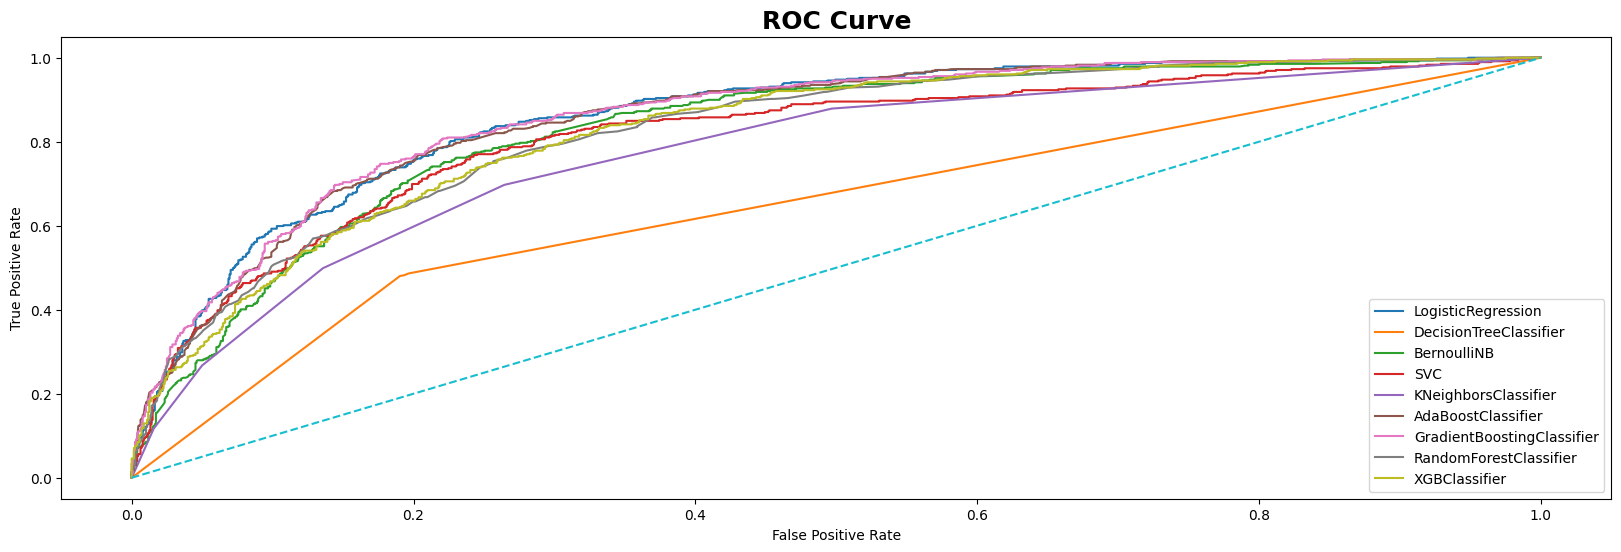

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve


plt.figure(figsize=(20, 6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0, 1], [0, 1],"--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",fontweight="bold",fontsize=18)
plt.legend()
plt.show()


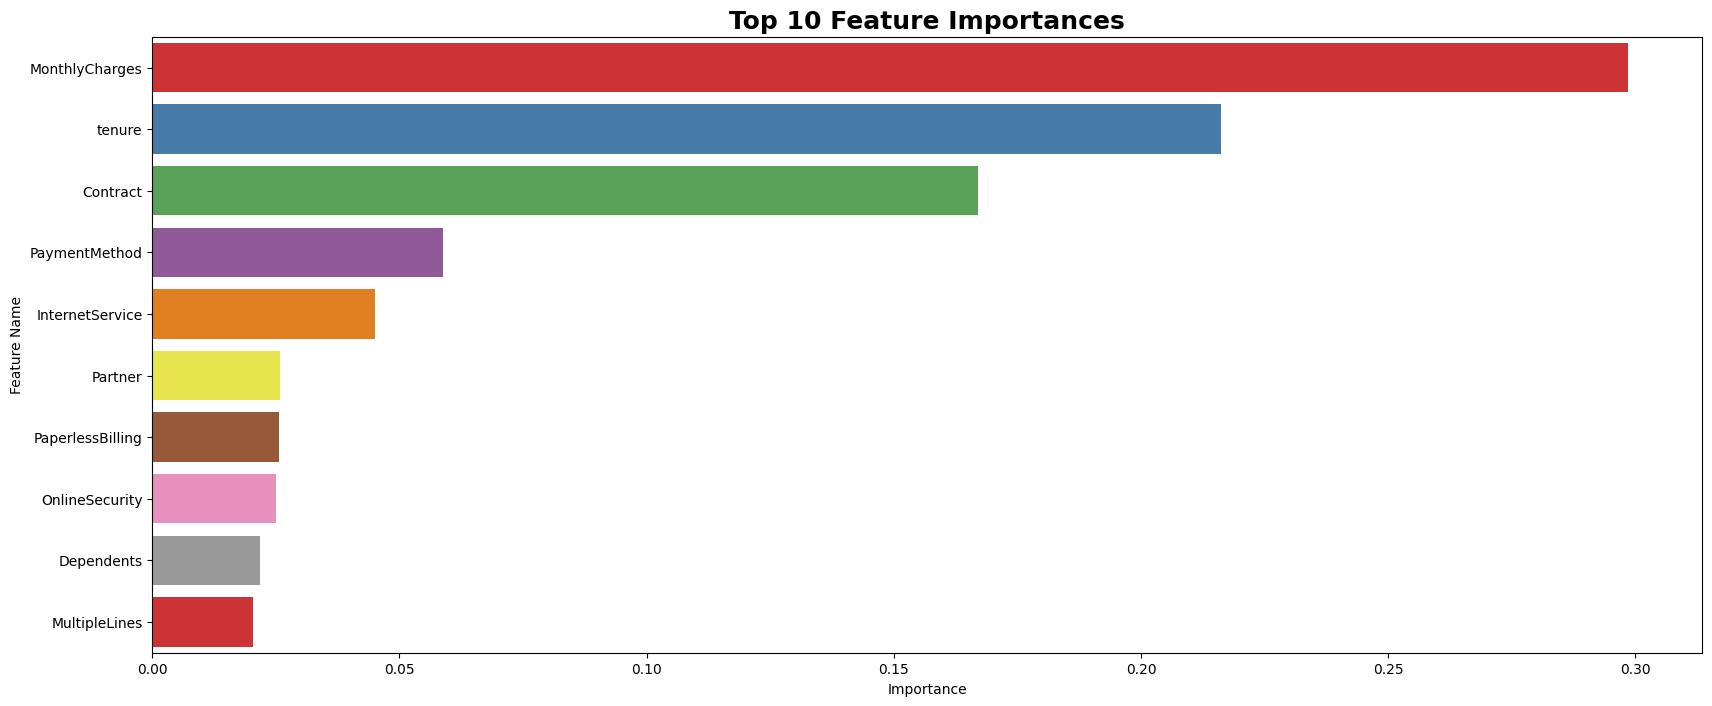

In [80]:

plt.figure(figsize=(20,8))
important_features= imp_df.sort_values(by="Importance", ascending=False).head(10)
sns.barplot(data=important_features, x='Importance', y='Feature Name',palette="Set1")
plt.title('Top 10 Feature Importances', fontsize=18,color="black",fontweight="bold")
plt.xlabel ('Importance', fontsize=10)
plt.ylabel ('Feature Name', fontsize=10)
plt.show()
